In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_blobs


# Problem 1
Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

In [2]:
from sklearn.datasets import load_breast_cancer
# Load training data
breast = load_breast_cancer()

breast_data = breast.data
labels = np.reshape(breast.target, (breast_data.shape[0], 1))
df = pd.DataFrame(np.concatenate([breast_data, labels], axis = 1))

n = breast_data.shape[1]
x = df.values[:, :n]
y = df.values[:, n]

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Performs MIN MAX scaling
sm = MinMaxScaler()
x = sm.fit_transform(x)

# Performs standardization
sc = StandardScaler()
x = sc.fit_transform(x)

In [4]:
from sklearn.decomposition import PCA

# Performs PCA on the data
pca = PCA()
principalComponents = pca.fit_transform(x)

In [5]:
from sklearn.model_selection import train_test_split

# Performs 80% and 20% split of the labelled data into training and test sets
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y, train_size=0.8,
                                                            test_size=0.2,
                                                            random_state=np.random)

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy. 

optimum number of K, principal components: linear kernel: 19
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        47
         1.0       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




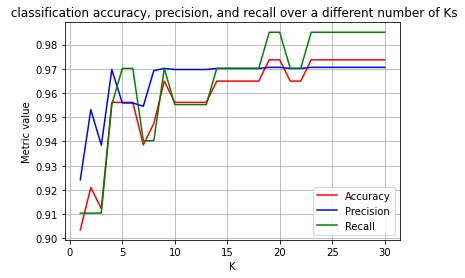

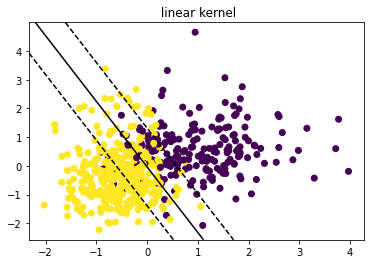

optimum number of K, principal components: poly kernel: 4
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        47
         1.0       0.86      1.00      0.92        67

    accuracy                           0.90       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.90      0.90       114




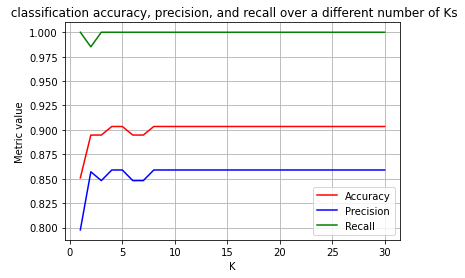

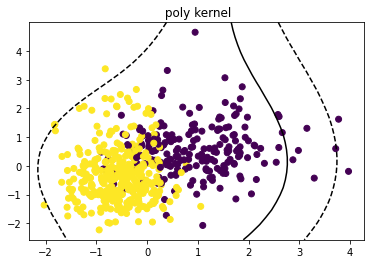

optimum number of K, principal components: rbf kernel: 8
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        47
         1.0       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




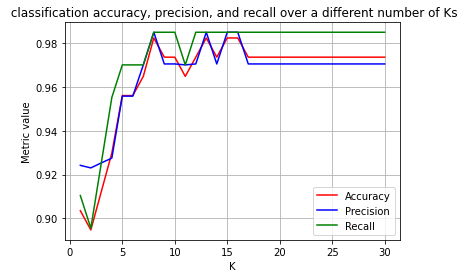

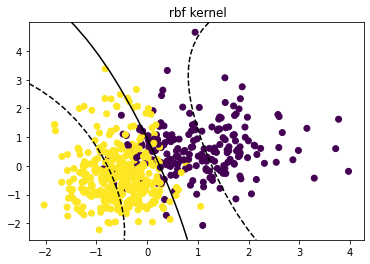

optimum number of K, principal components: sigmoid kernel: 7
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95        47
         1.0       0.94      0.99      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




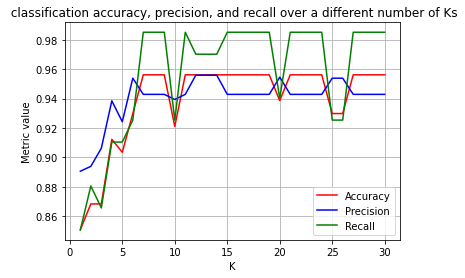

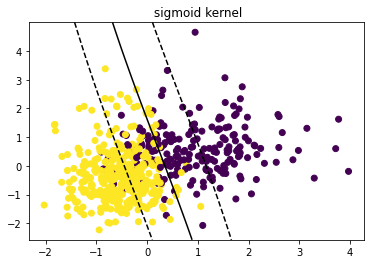

In [6]:
# evaluation metrics for SVM classifier
k = principalComponents.shape[1]
accuracy = np.zeros(k)
precision = np.zeros(k)
recall = np.zeros(k)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    acc_score = 0
    optimum_k = 0
    svm = None
    for j in range(k):
        # SVM classification
        model = SVC(kernel=kernels[i])
        model.fit(x_train[:, :j + 1], y_train)
        y_pred = model.predict(x_test[:, :j + 1])

        # Evaluates model using evaluation metrics
        accuracy[j] = metrics.accuracy_score(y_test, y_pred)
        precision[j] = metrics.precision_score(y_test, y_pred)
        recall[j] = metrics.recall_score(y_test, y_pred)

        if accuracy[j] > acc_score:
            acc_score = accuracy[j]
            optimum_k = j + 1
            svm = model
            
    print('optimum number of K, principal components: {} kernel:'.format(kernels[i]), optimum_k)
    print(classification_report(y_test, y_pred))
    print()
    
    # Part 2
    
    fig, ax1 = plt.subplots()
    # Plots accuracy, precision, and recall for varying numbers of PCs
    ax1.plot(np.linspace(1, k, k), accuracy, color='red',
             label='Accuracy')
    ax1.plot(np.linspace(1, k, k), precision, color='blue',
             label='Precision')
    ax1.plot(np.linspace(1, k, k), recall, color='green',
             label='Recall')
    ax1.grid()
    ax1.set_xlabel('K')
    ax1.set_ylabel('Metric value')
    ax1.set_title(' classification accuracy, precision, and recall over a different number of Ks')
    ax1.legend()
    plt.show()
    
     # Part 3

    fig, ax2 = plt.subplots()
    ax2.scatter(x[:, 0], x[:, 1], c=y)
    # Creates grid to evaluate model
    xlim = ax2.get_xlim()
    ylim = ax2.get_ylim()
    x_grid = np.linspace(xlim[0], xlim[1], 30)
    y_grid = np.linspace(ylim[0], ylim[1], 30)
    y_grid, x_grid = np.meshgrid(y_grid, x_grid)
    xy = np.vstack([x_grid.ravel(), np.zeros((optimum_k - 2, 900)), y_grid.ravel()]).T
    z = svm.decision_function(xy).reshape(x_grid.shape)

    # Plots decision boundary and margins
    ax2.contour(x_grid, y_grid, z, colors='k', levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])

    # Plots support vectors
    ax2.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                facecolors='none')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_title(' {} kernel'.format(kernels[i]))
    plt.show()

# Problem 2
Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [8]:
housing = pd.read_csv(r'C:\Users\achic\OneDrive\Desktop\ML-DataSets/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defines the map function to map strings to numbers in table
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [10]:
# Applies binary_map function to and selects features from housing_data
housing[varlist] = housing[varlist].apply(binary_map)
housing = housing[housing.columns[:12]]
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [11]:
X = housing.values[:,1:12]
Y = housing.values[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_tr = sc.fit_transform(X_train)
X_te = sc.fit_transform(X_test)

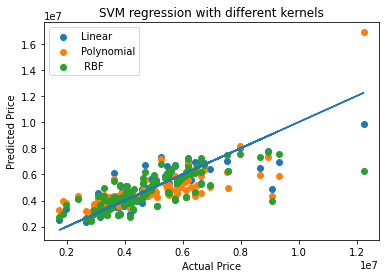

In [12]:
svr_linear = SVR(kernel = 'linear', C = 1e6)
svr_poly = SVR(kernel = 'poly', C = 1e5)
svr_rbf = SVR(kernel = 'rbf', C = 1e6)

svr_linear.fit(X_tr,Y_train)
svr_poly .fit(X_tr,Y_train)
svr_rbf.fit(X_tr, Y_train)

Y_linear = svr_linear.predict(X_te)
Y_poly = svr_poly .predict(X_te)
Y_rbf = svr_rbf.predict(X_te)

predictions = pd.DataFrame({'Y_test':Y_test, 'Y_pred_lin':Y_linear, 'Y_pred_poly':Y_poly, 'Y_pred_rbf':Y_rbf})

plt.scatter(Y_test, Y_linear, label = 'Linear')
plt.scatter(Y_test, Y_poly, label = 'Polynomial')
plt.scatter(Y_test, Y_rbf, label = ' RBF')
plt.plot(Y_test, Y_test)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVM regression with different kernels")
plt.legend()
plt.show()
